In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

In [2]:
# # error get_variable("cahr",shape=[a,b],initializer=tf.contrib.layers.xavier_initializer())

X = tf.placeholder(tf.float32,[None, 784])
Y = tf.placeholder(tf.float32,[None, 10])

# dropout
# dropout (keep_prob) rate  0.7 on training, but should be 1 for testing
keep_prob = tf.placeholder(tf.float32)

W1 = tf.get_variable("W1",shape=[784,512],initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X,W1) + b1)
L1 = tf.nn.dropout(L1,keep_prob=keep_prob)

W2 = tf.get_variable("W2",shape=[512,512],initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1,W2) + b2)
L2 = tf.nn.dropout(L2,keep_prob=keep_prob)

W3 = tf.get_variable("W3",shape=[512,512],initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2,W3) + b3)
L3 = tf.nn.dropout(L3,keep_prob=keep_prob)

W4 = tf.get_variable("W4",shape=[512,512],initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3,W4) + b4)
L4 = tf.nn.dropout(L4,keep_prob=keep_prob)

W5 = tf.get_variable("W5",shape=[512,10],initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4,W5) + b5


In [3]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

# parameters
learning_rate = 0.001
training_epoches = 15
batch_size = 100

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
        logits=hypothesis,labels=Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

In [5]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epoches):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs,Y: batch_ys,keep_prob:0.7}
        c, _ = sess.run([cost, optimizer],feed_dict=feed_dict)
        avg_cost += c / total_batch
    print('Epoch:','%04d'%(epoch+1),'cost = ','{:.09}'.format(avg_cost)) ## error{}
print('Learning finished!')       

Epoch: 0001 cost =  2.68394282
Epoch: 0002 cost =  2.42285417
Epoch: 0003 cost =  2.30310021
Epoch: 0004 cost =  2.19815173
Epoch: 0005 cost =  2.07024793
Epoch: 0006 cost =  1.91530796
Epoch: 0007 cost =  1.73442228
Epoch: 0008 cost =  1.5556923
Epoch: 0009 cost =  1.40123204
Epoch: 0010 cost =  1.27508925
Epoch: 0011 cost =  1.18057923
Epoch: 0012 cost =  1.10176993
Epoch: 0013 cost =  1.04135353
Epoch: 0014 cost =  0.9843379
Epoch: 0015 cost =  0.937704672
Learning finished!


### test model and check accuracy

In [12]:
correct_prediction = tf.equal(tf.argmax(hypothesis,1),tf.argmax(Y,1))
# Returns the index with the largest value across axes of a tensor.
# for we use 'softmax_cross_entropy_with_logits',
# the prediction are presented as the paobability
# by the argmax function we will get the index of largest probability of prediction
# but why we need use tf.arg_max(Y,1)?
accracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

print('Accuracy:',sess.run(accracy,feed_dict={X: mnist.test.images, 
                                             Y: mnist.test.labels,
                                            keep_prob:1}))


Accuracy: 0.8114


### get one picture, predict then draw a picture

In [10]:
r = random.randint(0,mnist.test.num_examples - 1)
mnist_test = mnist.test
label = mnist_test.labels[r:r+1]
image = mnist_test.images[r:r+1]
print("Label:", sess.run(tf.argmax(label,1)))
print("Prediction:",sess.run(
      tf.argmax(hypothesis,1),feed_dict={X:image}))

Label: [7]


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_2' with dtype float
	 [[Node: Placeholder_2 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder_2', defined at:
  File "/home/cine/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/cine/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/cine/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/cine/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/cine/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/home/cine/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/cine/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/cine/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/cine/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/cine/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/cine/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/cine/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/cine/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/cine/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/cine/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/cine/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/cine/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/cine/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/cine/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/cine/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-3d046fd78df9>", line 8, in <module>
    keep_prob = tf.placeholder(tf.float32)
  File "/home/cine/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1502, in placeholder
    name=name)
  File "/home/cine/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2149, in _placeholder
    name=name)
  File "/home/cine/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "/home/cine/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2327, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/cine/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1226, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_2' with dtype float
	 [[Node: Placeholder_2 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


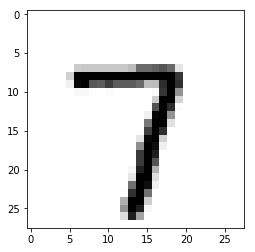

In [11]:
plt.imshow(image.reshape(28,28),cmap='Greys',interpolation='nearest')
plt.show()